In [1]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import model
from tensorflow.keras.layers import Activation, Dropout, Conv2D, Convolution2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

In [2]:
import tensorflow as tf
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14529678012299307597]

In [3]:
batch_size = 64
nb_epoch = 25
nb_classes = 3
image_shape = [64, 64, 3]

In [4]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), padding='same', input_shape=image_shape))
model.add(Activation('relu'))
model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [5]:
model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 64)        1

In [100]:
datagen = ImageDataGenerator(width_shift_range=.2, height_shift_range=.2, shear_range=0.05, zoom_range=.1,
                             fill_mode='nearest', rescale=1. / 255)
image_data_gen = datagen.flow_from_directory('images', target_size=(64, 64), classes=['green', 'red', 'unknown'],
                                             batch_size=batch_size)

Found 43717 images belonging to 3 classes.


In [101]:
model.fit_generator(generator=image_data_gen,
                    epochs=nb_epoch,
                    use_multiprocessing=True,
                    workers=4)

/home/jaeoh2/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
684/684 [==============================] - 267s 389ms/step - loss: 0.2674 - accuracy: 0.9246
Epoch 2/25
684/684 [==============================] - 266s 389ms/step - loss: 0.1645 - accuracy: 0.9582
Epoch 3/25
684/684 [==============================] - 266s 388ms/step - loss: 0.1525 - accuracy: 0.9623
Epoch 4/25
684/684 [==============================] - 266s 389ms/step - loss: 0.1489 - accuracy: 0.9634
Epoch 5/25
684/684 [==============================] - 267s 389ms/step - loss: 0.1429 - accuracy: 0.9655
Epoch 6/25
684/684 [==============================] - 267s 389ms/step - loss: 0.1408 - accuracy: 0.9672
Epoch 7/25
684/684 [==============================] - 268s 391ms/step - loss: 0.1452 - accuracy: 0.9664
Epoch 8/25
684/684 [==============================] - 267s 390ms/step - loss: 0.1489 - accuracy: 0.9663
Epoch 9/25
684/684 [==============================] - 268s 391ms/step - loss: 0.1370 - accuracy: 0.9682
Epoch 10/25
684/684 [==============================] - 267s 390m

In [102]:
model.save('light_classifier_model.h5')

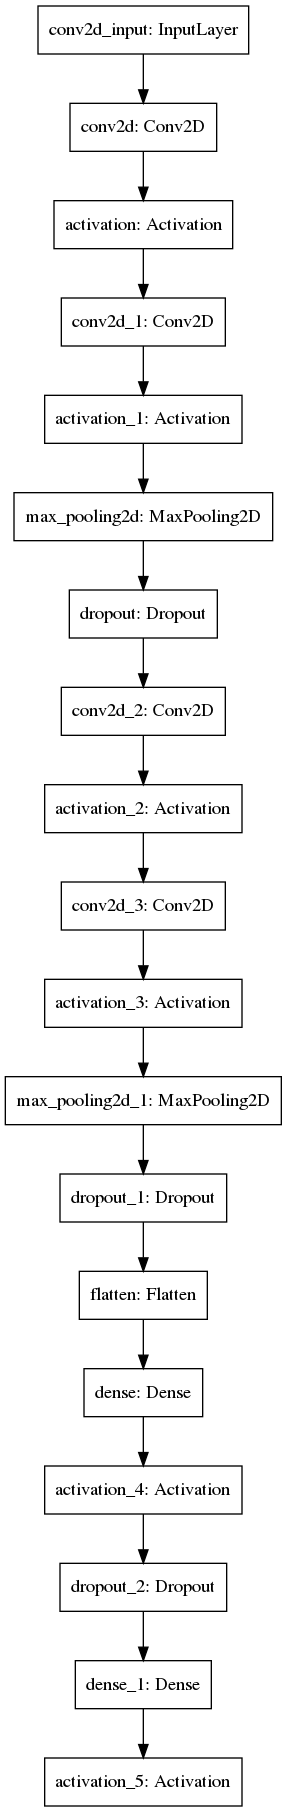

In [6]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')